# installing required packages

In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


## importing required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [5]:
calories = pd.read_csv('train.csv',  encoding = 'latin-1')
calories.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [6]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


## changing male as 0 and female as 1

In [8]:
calories['Sex'] = calories['Sex'].map({'male': 0, 'female':1})
calories.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,0,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,1,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,1,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,0,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,1,38,166.0,61.0,25.0,102.0,40.6,146.0


DATA VISUALIZATION
## Understanding the target distribution checking skewness

In [10]:
calories['Calories'].skew()

0.539196264522959

<Axes: xlabel='Calories', ylabel='Count'>

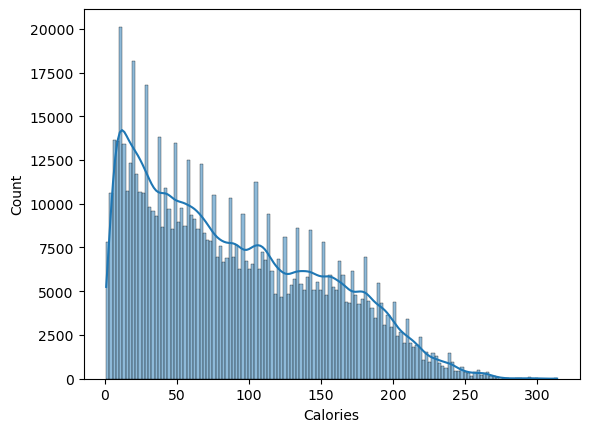

In [11]:
sns.histplot(calories['Calories'], kde=True)

# Scatter plot (numerical features vs target)

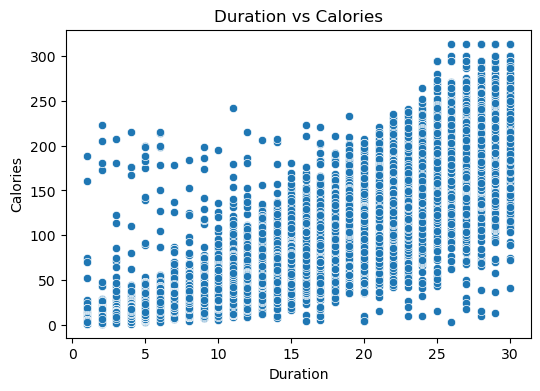

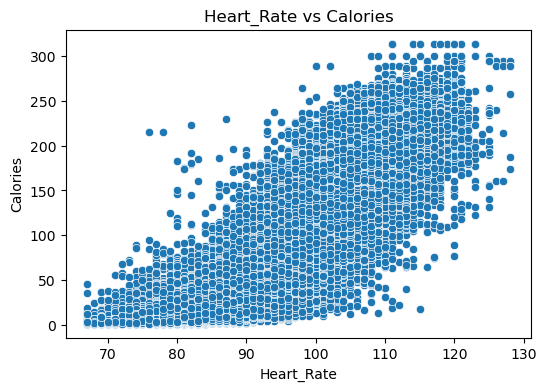

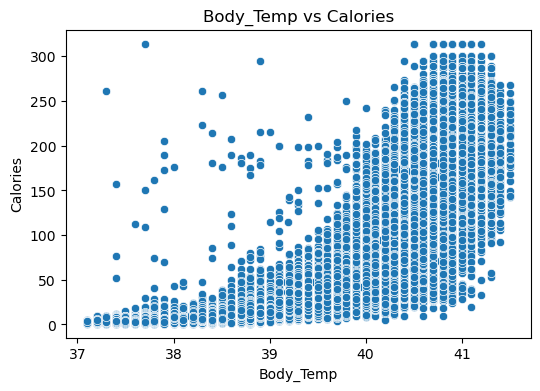

In [13]:
numeric_features = ['Duration', 'Heart_Rate', 'Body_Temp' ]
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=calories, x=col, y='Calories' )
    plt.title(f'{col} vs Calories')
    plt.show()

## plotting heatmap

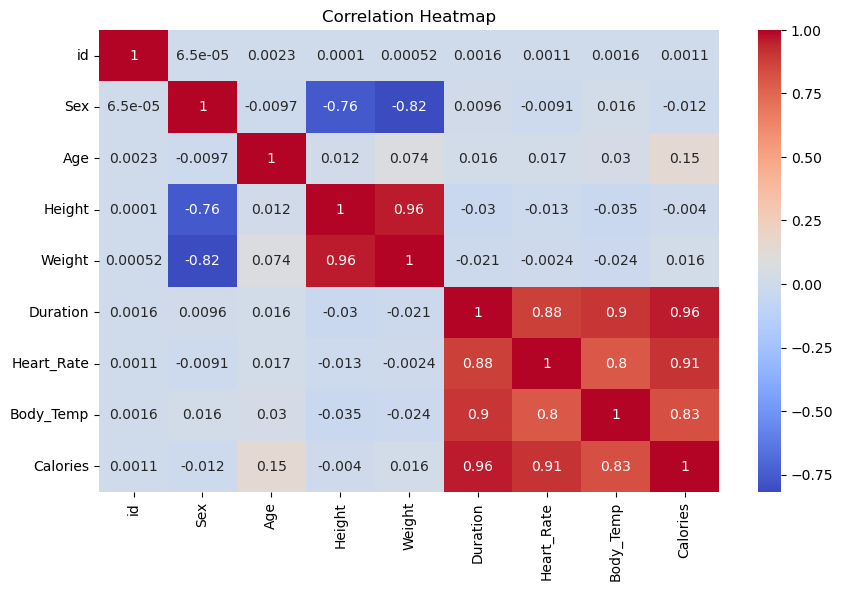

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(calories.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# checking for outliers and poltting boxplot

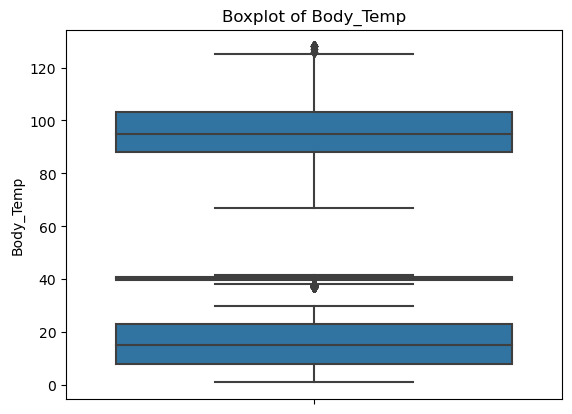

In [17]:
numerical_features = ['Duration', 'Heart_Rate', 'Body_Temp' ]

for features  in numerical_features:
    sns.boxplot(data=calories, y=features)
    plt.title(f"Boxplot of {features}")
    plt.show

## counting the number of outliers

In [19]:
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers.shape[0]

In [20]:
numerical_features = ['Duration', 'Heart_Rate', 'Body_Temp', 'Calories']  # adjust as per your dataset

for col in numerical_features:
    n_outliers = count_outliers_iqr(calories, col)
    print(f"{col}: {n_outliers} outliers")


Duration: 0 outliers
Heart_Rate: 36 outliers
Body_Temp: 14919 outliers
Calories: 139 outliers


# Data preprocessing

In [22]:
#checking for missing values
calories.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# splitting features and target

In [24]:
X = calories.drop('Calories', axis=1)
Y = np.log1p(calories['Calories'])

# Model Training

In [26]:
import xgboost as xgb
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# model using stacking (using xgboost and ridge regression)

In [30]:
# Base model: XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)
# Meta-model: Ridge Regression
meta_model = Ridge(alpha=1.0)

# Stacking Regressor
model = StackingRegressor(
    estimators=[('xgb', xgb_model)],
    final_estimator=meta_model,
    passthrough=True,  # allows meta-model to use original features too
    n_jobs=-1
)

# MODEL USING XGBRegessor from xgboost


model = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    n_jobs=-1
)

In [32]:
model.fit(X,Y)

StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=-1,
                                            num_parallel_tree=None, ...))],
                  final_estimator=Ridge(), n_jobs=-1, passthrough=True)

# Now we trained the model its time to use  this model to get test dataset prediction 

In [36]:
test_data = pd.read_csv('test.csv', encoding = 'latin-1')
test_data.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [38]:
test_data['Sex'] = test_data['Sex'].map({'male':0, 'female':1})
test_data.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,0,45,177.0,81.0,7.0,87.0,39.8
1,750001,0,26,200.0,97.0,20.0,101.0,40.5
2,750002,1,29,188.0,85.0,16.0,102.0,40.4
3,750003,1,39,172.0,73.0,20.0,107.0,40.6
4,750004,1,30,173.0,67.0,16.0,94.0,40.5


In [40]:
# Predict using the model (log scale)
pred_log = model.predict(test_data)
# Convert back to original scale
pred_calories = np.expm1(pred_log)

In [42]:
# Create submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'],
    'Calories': pred_calories
})

In [44]:
submission.head()

,id,Calories
0,750000,27.171974
1,750001,109.659751
2,750002,86.275666
3,750003,124.656718
4,750004,75.651326


In [46]:
# Save to CSV
submission.to_csv('submission2.csv', index=False)
print("✅ Submission file 'submission.csv' saved!")

✅ Submission file 'submission.csv' saved!


test score using stacking is : 0.05904
test score using xgboost  is : 0.5974